In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore")
# import mglearn
import os.path
import os,re
import glob
import pprint
import pathlib
import threading
import time
import joblib
from pandas import DataFrame
from datetime import datetime,timedelta
import datetime
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
import joblib
from tensorflow import keras
from sklearn.utils import shuffle

### Extracting Images

In [2]:
file_destination = r'C:\Users\SM-PC\BDJ\BDJ_Spectrogram_deep\sp1'
import cv2

image_w = 32
image_h = 32

X = []
Y = []
for f in glob.glob(file_destination + "/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img, (image_w, image_h))
    X.append(img)

In [3]:
ls = []
for f in os.listdir(file_destination):
#      print((f.split('_')[0:2][0])+'_'+(f.split('_')[0:2][1]))
#     print(f.split('_')[0])
     labels = (f.split('_')[0:2][0])+'_'+(f.split('_')[0:2][1])
     ls.append(labels)

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(ls)
label = encoder.transform(ls)
# print the decoded labels
encoder.inverse_transform(label)

array(['axis_11', 'axis_11', 'axis_11', ..., 'rotating_5d5',
       'rotating_5d5', 'rotating_5d5'], dtype='<U12')

In [5]:
from keras.utils import np_utils
label_cat = np_utils.to_categorical(label)

In [6]:
X = np.array(X)
Y = np.array(label_cat)
# print(X,Y)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                    shuffle=True,test_size=0.3,
                                                    random_state=99,
                                                    stratify=Y)
xy = (X_train, X_test, y_train, y_test)

X_train = X_train.astype("float") / 255.0
X_test  = X_test.astype("float")  / 255.0
print('X_train shape:', X_train.shape)

X_train shape: (30094, 32, 32, 3)


### CNN 

In [9]:
from keras.models import Sequential,Model
from keras.layers import MaxPooling2D,MaxPooling3D,UpSampling2D,Input,Conv2DTranspose
from keras.layers import Conv2D,Conv3D
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.layers import BatchNormalization, Dropout

In [10]:
def hist(hist):
    
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

    acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuray')
    
    acc_ax.set_ylim(0.6,0.83)
    
    loss_ax.legend(bbox_to_anchor=(-0.1,0.15))
    acc_ax.legend(bbox_to_anchor=(1.35,1))

    plt.show()

In [15]:
# Define the input shape
input_shape = (32, 32, 3)  # Assuming the input image size is 28x28 with 1 channel

# Define the CNN architecture
model9 = tf.keras.Sequential([
    # Image Block
    Conv2D(filters=16, kernel_size=3, activation='relu', padding='same', input_shape=input_shape),
    Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.25),
    Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'),
    Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.25),

    # Classification Head
    Flatten(),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(units=43, activation='softmax')
])

# Compile the model with the given optimizer and learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model9.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model9.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)       18560     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                  

In [16]:
history9 = model9.fit(X_train,y_train,validation_data=(X_test,y_test),
       batch_size = 16,epochs=100)

Epoch 1/100
1881/1881 [==============================] - 5s 3ms/step - loss: 0.8776 - accuracy: 0.6694 - val_loss: 0.3194 - val_accuracy: 0.8052
Epoch 2/100
1881/1881 [==============================] - 5s 3ms/step - loss: 0.3383 - accuracy: 0.8044 - val_loss: 0.3097 - val_accuracy: 0.8092
Epoch 3/100
1881/1881 [==============================] - 5s 3ms/step - loss: 0.3173 - accuracy: 0.8060 - val_loss: 0.3684 - val_accuracy: 0.7930
Epoch 4/100
1881/1881 [==============================] - 5s 3ms/step - loss: 0.3016 - accuracy: 0.8103 - val_loss: 0.3715 - val_accuracy: 0.7806
Epoch 5/100
1881/1881 [==============================] - 5s 3ms/step - loss: 0.2951 - accuracy: 0.8090 - val_loss: 0.2833 - val_accuracy: 0.8134
Epoch 6/100
1881/1881 [==============================] - 5s 3ms/step - loss: 0.2908 - accuracy: 0.8078 - val_loss: 0.2859 - val_accuracy: 0.8127
Epoch 7/100
1881/1881 [==============================] - 5s 3ms/step - loss: 0.2887 - accuracy: 0.8093 - val_loss: 0.2932 - val_ac

In [20]:
model9.evaluate(X_train,y_train)

941/941 [==============================] - 1s 1ms/step - loss: 0.2605 - accuracy: 0.8141


[0.2604929804801941, 0.8141157627105713]

In [21]:
model9.evaluate(X_test,y_test)

404/404 [==============================] - 1s 2ms/step - loss: 0.2608 - accuracy: 0.8128


[0.2608398497104645, 0.812761664390564]

In [18]:
model9.save('BDJ_CNN_Models/history9.h5')

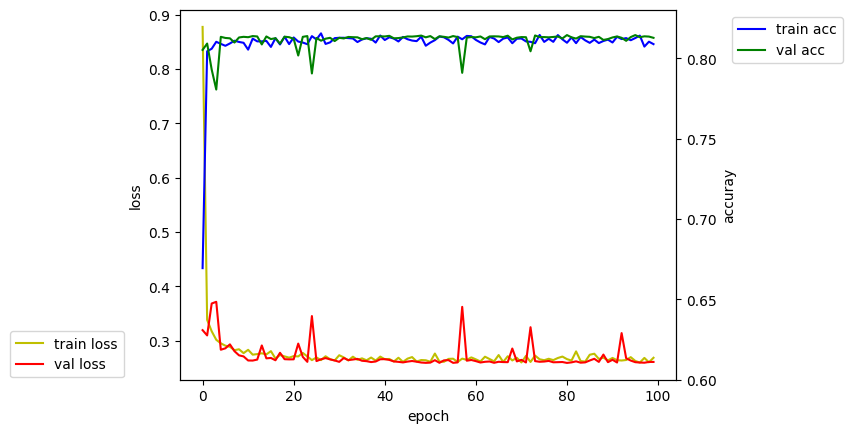

In [17]:
hist(history9)

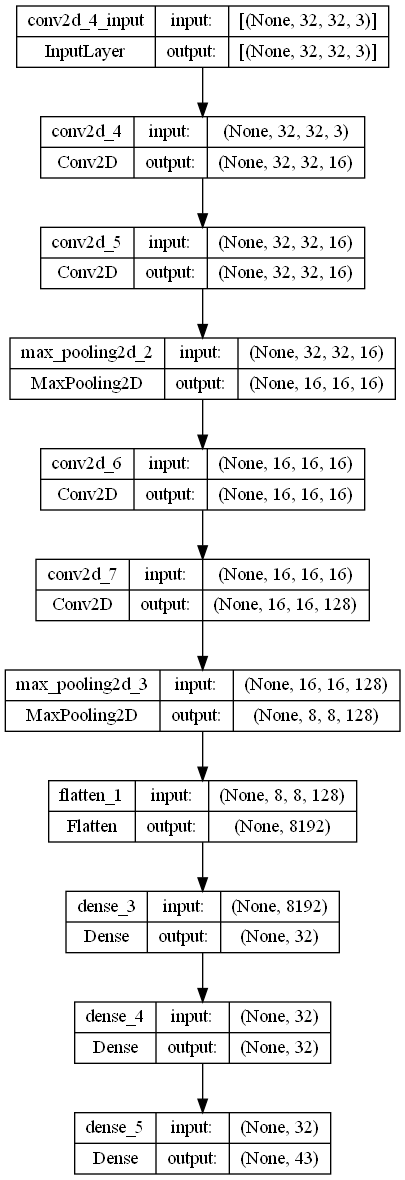

In [19]:
from keras.utils import plot_model
from tensorflow.keras.utils import plot_model

plot_model(model9, to_file="BDJ_CNN_ModelArchitecture/model9.png", show_shapes=True)